# Approximate Level Transition Strain Form

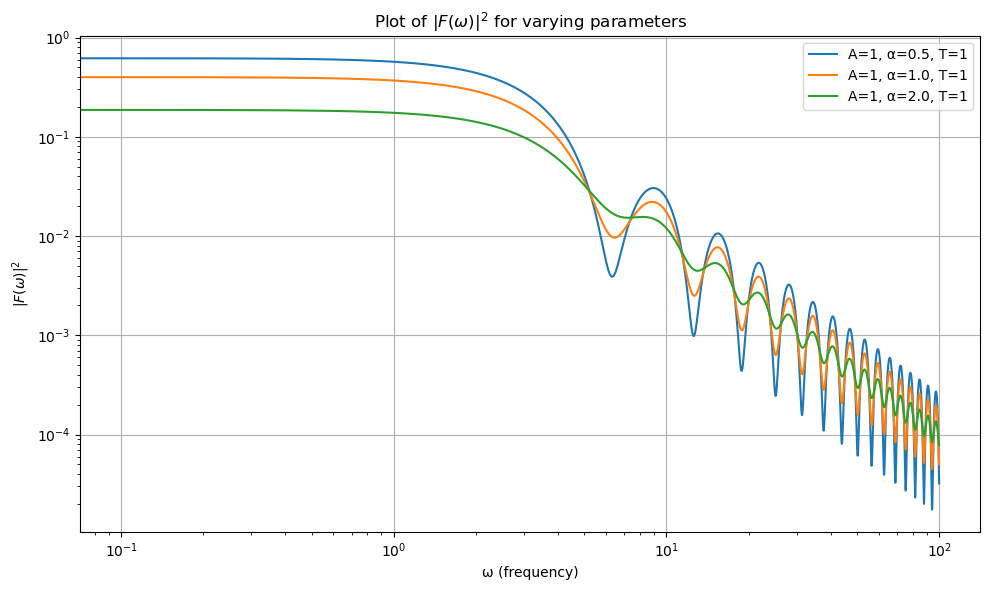

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt

def F_squared(omega, A, alpha, T):
    numerator = A**2
    denominator = alpha**2 + omega**2
    exp_term = np.exp(-alpha * T)
    bracket = 1 - 2 * exp_term * np.cos(omega * T) + np.exp(-2 * alpha * T)
    return (numerator / denominator) * bracket

def plot_F_squared(
    A_vals=[1], alpha_vals=[1], T_vals=[1], 
    omega_range=(-10, 10), num_points=1000
):
    omega = np.linspace(*omega_range, num_points)
    
    plt.figure(figsize=(10, 6))
    for A in A_vals:
        for alpha in alpha_vals:
            for T in T_vals:
                y = F_squared(omega, A, alpha, T)
                label = f"A={A}, α={alpha}, T={T}"
                plt.plot(omega, y, label=label)

    plt.xlabel("ω (frequency)")
    plt.ylabel(r"$|F(\omega)|^2$")
    plt.yscale('log')
    plt.xscale('log')
    plt.title(r"Plot of $|F(\omega)|^2$ for varying parameters")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_F_squared(
A_vals=[1],
alpha_vals=[0.5, 1.0, 2.0],
T_vals=[1],
omega_range=(0, 1e2)
)


# Superradiance Transition Rates

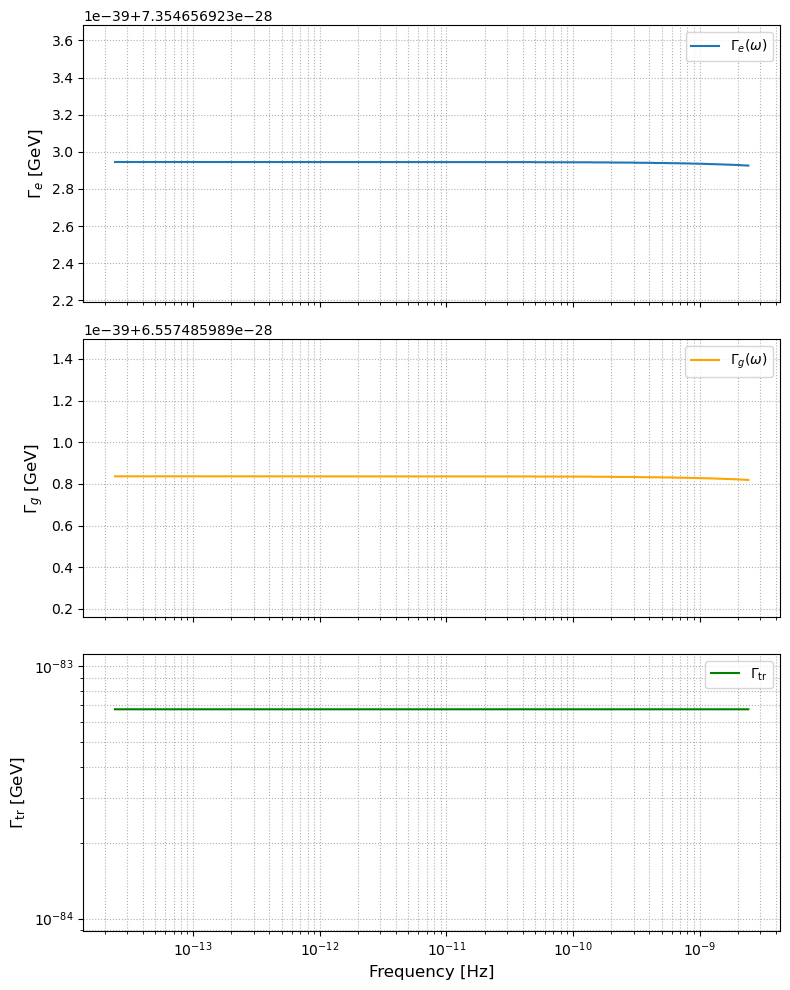

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constants ---
Mp = 1.220890e19
G = 1 / Mp**2           # Newton's G in GeV^-2
gev_to_hz = 6.582119569e-25 # GeV to Hz
M_sun = 1.989e30 * 5.61e26  # Solar mass in GeV
Mpc_to_Gev = 1.56e38        # 1 Mpc in GeV
kpc_to_Gev = Mpc_to_Gev / 1000

# --- Level Transition Parameters ---
ne, ng = 6, 5
l = m = ng - 1
r_kpc = 1
r = r_kpc * kpc_to_Gev
M_tr = 1e-6 * M_sun
mu_a = 1e-13  # GeV
a_tr = 0.999999
alpha_tr = G * M_tr * mu_a

# --- Transition Frequency ---
omega_tr = 0.5 * mu_a * alpha_tr**2 * (1/ng**2 - 1/ne**2)

# --- Frequency Range (GeV) ---
omega = np.logspace(-31, -27, 10000)

# --- Compute Gamma values for each omega ---
gamma_e_vals = np.array([super_gamma(ne, l, m, w, mu_a, M_tr, r_plus(M_tr, a_tr), a_tr) for w in omega])
gamma_g_vals = np.array([super_gamma(ng, l, m, w, mu_a, M_tr, r_plus(M_tr, a_tr), a_tr) for w in omega])
gamma_tr_val = gamma_t(ng, ne, mu_a, alpha_tr, M_tr)  # constant
gamma_tv = []
gamma_tv = [gamma_tr_val for w in omega]
# --- Convert omega to Hz for plotting ---
hbar_GeVs = 6.582e-25 
f_hz = omega / (2 * np.pi * hbar_GeVs)
dt = 1 / (2 * np.max(f_hz))
ann_strain_abs /= dt

# --- Plot ---
fig, axes = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

# γ_e(ω)
axes[0].plot(omega_hza, gamma_e_vals, label=r"$\Gamma_e(\omega)$")
# axes[0].set_xscale("log")
# axes[0].set_yscale("log")
axes[0].set_ylabel(r"$\Gamma_e$ [GeV]", fontsize=12)
axes[0].grid(True, which='both', ls=':')
axes[0].legend()

# γ_g(ω)
axes[1].plot(omega_hza, gamma_g_vals, label=r"$\Gamma_g(\omega)$", color='orange')
# axes[1].set_xscale("log")
# axes[1].set_yscale("log")
axes[1].set_ylabel(r"$\Gamma_g$ [GeV]", fontsize=12)
axes[1].grid(True, which='both', ls=':')
axes[1].legend()

# γ_tr (constant)
axes[2].plot(omega_hza, np.full_like(omega_hza, gamma_tv), label=r"$\Gamma_{\mathrm{tr}}$", color='green')
axes[2].set_xscale("log")
axes[2].set_yscale("log")
axes[2].set_xlabel(r"Frequency [Hz]", fontsize=12)
axes[2].set_ylabel(r"$\Gamma_{\mathrm{tr}}$ [GeV]", fontsize=12)
axes[2].grid(True, which='both', ls=':')
axes[2].legend()

plt.tight_layout()
plt.show()

# Compare to direct FFT

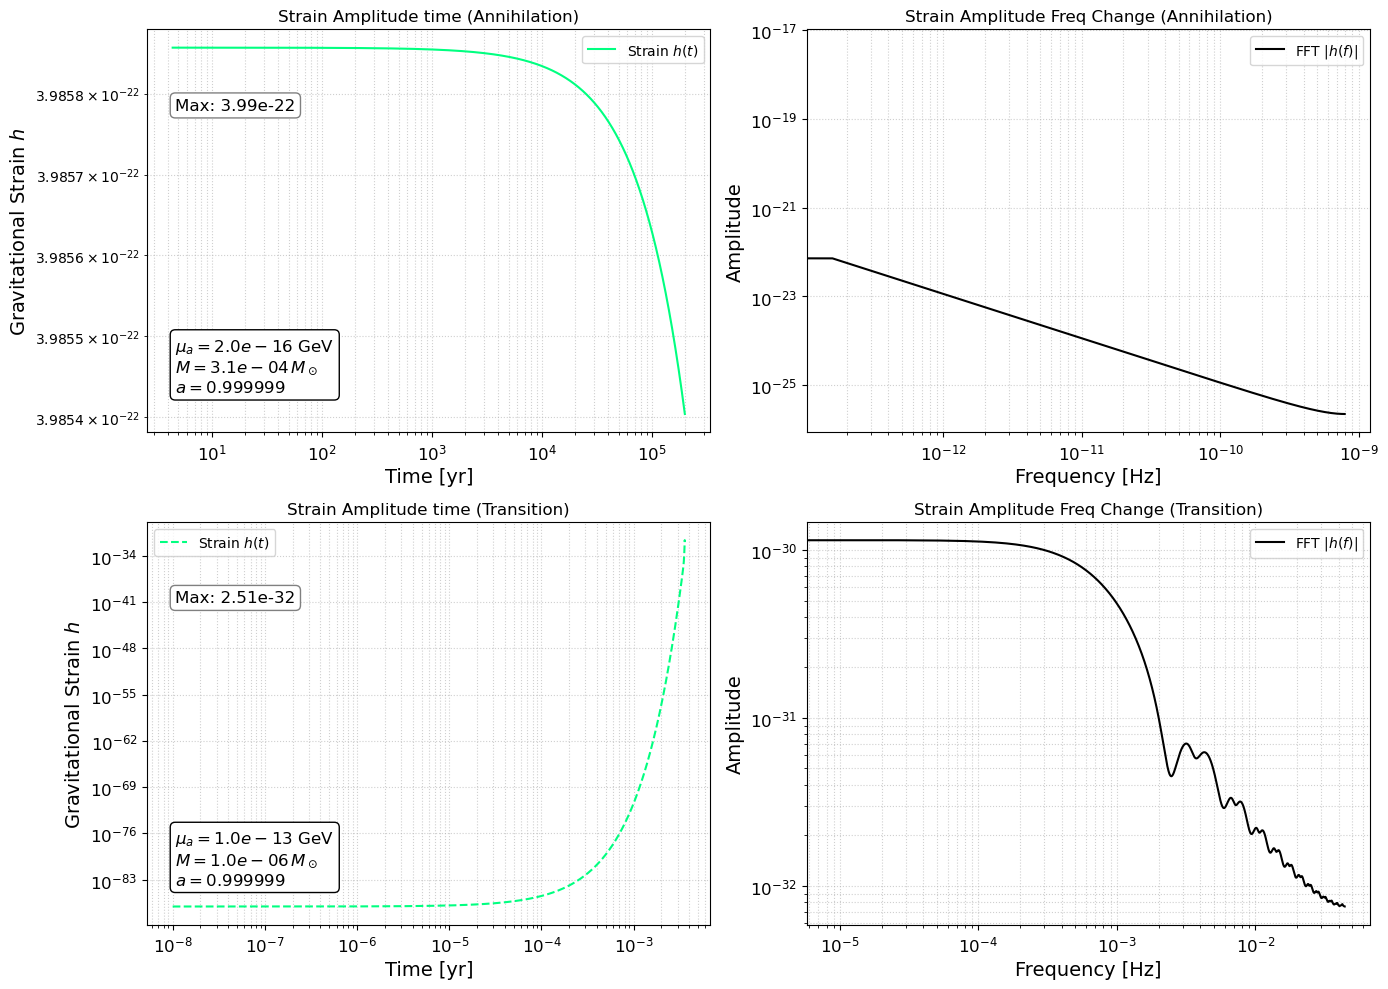

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from grav_atom_templates import simulate_axion_annihilation, simulate_two_level_evolution

# Parameters
M_ann = 3.1e-04  # in solar masses
mua_ann = 2e-16  # in GeV
a_ann = 0.999999

M_tr = 1e-06     # in solar masses
mua_tr = 1e-13   # in GeV
a_tr = 0.999999

# --- Run Annihilation Scenario ---
time_ann, N_ann, h_ann, freqs_ann, fft_ann = simulate_axion_annihilation(
    M_bh_solar_mass=M_ann,
    mua=mua_ann,
    a0=a_ann,
    d_kpc=1,
    n=4,
    l=3,
    m=3,
    num_steps=100000
)

# --- Run Two-Level Scenario ---
time_tr, N_exc, N_gnd, h_tr, nass_evol, spin_evol, freqs_tr, fft_tr = simulate_two_level_evolution(
    M_bh_solar_mass=M_tr,
    mua=mua_tr,
    a0=a_tr,
    dist_kpc=1,
    ne=6,
    ng=5,
    l=4,
    m=4,
    num_steps=10000
)


# # === Plotting ===
# fig, axes = plt.subplots(3, 2, figsize=(16, 14))
# colors = plt.cm.winter(np.linspace(0, 1, 4))
# fsize = 14

# # --- Annihilation: Population ---
# axes[0, 0].plot(time_ann, N_ann, color=colors[2], label='Annihilation $N(t)$')
# axes[0, 0].set_yscale('log')
# axes[0, 0].set_xscale('log')
# axes[0, 0].set_ylabel('Population $N$', fontsize=fsize)
# axes[0, 0].legend()
# axes[0, 0].set_title('Axion Annihilation Evolution', fontsize=fsize)
# max_N_ann = np.max(N_ann)
# axes[0, 0].text(0.05, 0.8, f'Max: {max_N_ann:.2e}', transform=axes[0, 0].transAxes,
#                 fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))

# # --- Annihilation: Strain ---
# axes[1, 0].plot(time_ann, np.abs(h_ann), color=colors[3], label='Strain $h(t)$')
# axes[1, 0].set_yscale('log')
# axes[1, 0].set_xscale('log')
# axes[1, 0].set_xlabel('Time [yr]', fontsize=fsize)
# axes[1, 0].set_ylabel('Gravitational Strain $h$', fontsize=fsize)
# axes[1, 0].legend()
# max_h_ann = np.nanmax(h_ann)
# axes[1, 0].text(0.05, 0.8, f'Max: {max_h_ann:.2e}', transform=axes[1, 0].transAxes,
#                 fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))
# axes[1, 0].text(0.05, 0.1,
#                 f'$\\mu_a={mua_ann:.1e}$ GeV\n$M={M_ann:.1e}\\,M_\\odot$\n$a={a_ann:.6f}$',
#                 transform=axes[1, 0].transAxes,
#                 fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# # --- Annihilation: FFT ---
# axes[2, 0].plot(freqs_ann, np.abs(fft_ann), color='black', label='FFT $|h(f)|$')
# axes[2, 0].set_xscale('log')
# axes[2, 0].set_yscale('log')
# axes[2, 0].set_xlabel('Frequency [Hz]', fontsize=fsize)
# axes[2, 0].set_ylabel('Amplitude', fontsize=fsize)
# axes[2, 0].set_title(' Strain Amplitude Freq Change ')
# axes[2, 0].legend()

# # --- Transition: Population ---
# axes[0, 1].plot(time_tr, N_exc, color=colors[0], label='$N_{(6,4,4)}$ (Excited)')
# axes[0, 1].plot(time_tr, N_gnd, color=colors[2], label='$N_{(5,4,4)}$ (Ground)')
# axes[0, 1].set_yscale('log')
# axes[0, 1].set_xscale('log')
# axes[0, 1].legend()
# axes[0, 1].set_title('Two-Level Transition Evolution', fontsize=fsize)
# max_N_exc = np.max(N_exc)
# max_N_gnd = np.max(N_gnd)
# axes[0, 1].text(0.05, 0.8, f'Max Exc: {max_N_exc:.2e}', transform=axes[0, 1].transAxes,
#                 fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))
# axes[0, 1].text(0.05, 0.7, f'Max Gnd: {max_N_gnd:.2e}', transform=axes[0, 1].transAxes,
#                 fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))

# # --- Transition: Strain ---
# axes[1, 1].plot(time_tr, h_tr, color=colors[3], linestyle='dashed', label='Strain $h(t)$')
# axes[1, 1].set_yscale('log')
# axes[1, 1].set_xscale('log')
# axes[1, 1].set_xlabel('Time [yr]', fontsize=fsize)
# axes[1, 1].set_ylabel('Gravitational Strain $h$', fontsize=fsize)
# axes[1, 1].legend()
# max_h_tr = np.max(h_tr)
# axes[1, 1].text(0.05, 0.8, f'Max: {max_h_tr:.2e}', transform=axes[1, 1].transAxes,
#                 fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))
# axes[1, 1].text(0.05, 0.1,
#                 f'$\\mu_a={mua_tr:.1e}$ GeV\n$M={M_tr:.1e}\\,M_\\odot$\n$a={a_tr:.6f}$',
#                 transform=axes[1, 1].transAxes,
#                 fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# # --- Transition: FFT ---
# axes[2, 1].plot(freqs_tr, fft_tr, color='black', label='FFT $|h(f)|$')
# axes[2, 1].set_xscale('log')
# axes[2, 1].set_yscale('log')
# axes[2, 1].set_xlabel('Frequency [Hz]', fontsize=fsize)
# axes[2, 1].set_ylabel('Amplitude', fontsize=fsize)
# axes[2, 1].set_title('Strain Amplitude Freq Change')
# axes[2, 1].legend()

# === Plotting: Strain + FFT for Annihilation and Transition ===
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = plt.cm.winter(np.linspace(0, 1, 4))
fsize = 14

# --- Annihilation: Strain ---
axes[0, 0].plot(time_ann, np.abs(h_ann), color=colors[3], label='Strain $h(t)$')
axes[0, 0].set_yscale('log')
axes[0, 0].set_xscale('log')
axes[0, 0].set_xlabel('Time [yr]', fontsize=fsize)
axes[0, 0].set_ylabel('Gravitational Strain $h$', fontsize=fsize)
axes[0, 0].set_title('Strain Amplitude time (Annihilation)')
axes[0, 0].legend()
max_h_ann = np.nanmax(h_ann)
axes[0, 0].text(0.05, 0.8, f'Max: {max_h_ann:.2e}', transform=axes[0, 0].transAxes,
                fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))
axes[0, 0].text(0.05, 0.1,
                f'$\\mu_a={mua_ann:.1e}$ GeV\n$M={M_ann:.1e}\\,M_\\odot$\n$a={a_ann:.6f}$',
                transform=axes[0, 0].transAxes,
                fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# --- Annihilation: FFT ---
axes[0, 1].plot(freqs_ann, np.abs(fft_ann), color='black', label='FFT $|h(f)|$')
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')
axes[0, 1].set_xlabel('Frequency [Hz]', fontsize=fsize)
axes[0, 1].set_ylabel('Amplitude', fontsize=fsize)
axes[0, 1].set_title('Strain Amplitude Freq Change (Annihilation)')
axes[0, 1].legend()

# --- Transition: Strain ---
axes[1, 0].plot(time_tr, h_tr, color=colors[3], linestyle='dashed', label='Strain $h(t)$')
axes[1, 0].set_yscale('log')
axes[1, 0].set_xscale('log')
axes[1, 0].set_xlabel('Time [yr]', fontsize=fsize)
axes[1, 0].set_ylabel('Gravitational Strain $h$', fontsize=fsize)
axes[1, 0].set_title('Strain Amplitude time (Transition)')
axes[1, 0].legend()
max_h_tr = np.max(h_tr)
axes[1, 0].text(0.05, 0.8, f'Max: {max_h_tr:.2e}', transform=axes[1, 0].transAxes,
                fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))
axes[1, 0].text(0.05, 0.1,
                f'$\\mu_a={mua_tr:.1e}$ GeV\n$M={M_tr:.1e}\\,M_\\odot$\n$a={a_tr:.6f}$',
                transform=axes[1, 0].transAxes,
                fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# --- Transition: FFT ---
axes[1, 1].plot(freqs_tr, fft_tr, color='black', label='FFT $|h(f)|$')
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')
axes[1, 1].set_xlabel('Frequency [Hz]', fontsize=fsize)
axes[1, 1].set_ylabel('Amplitude', fontsize=fsize)
axes[1, 1].set_title('Strain Amplitude Freq Change (Transition)')
axes[1, 1].legend()



# Formatting
for ax in axes.flat:
    ax.grid(True, which='both', linestyle=':', alpha=0.6)
    ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

# Universal Parameters

In [33]:
Mp = 1.220890e19
G = 1 / Mp**2
M_sun = 2e30 * 5.61e26

M_ann = 3.1e-04  # in solar masses
mua_ann = 2e-16  # in GeV
a_ann = 0.999999
alpha_ann = G*M_ann*mua_ann

M_tr = 1e-06     # in solar masses
mua_tr = 1e-13   # in GeV
a_tr = 0.999999
alpha_tr = G*M_tr*mua_tr

# Universal Functions

In [34]:

def Omega_plus(a, r):
    return a / (2 * r)

def r_plus(M, a):
    return M * (1 + np.sqrt(1 - a**2)) * G

def gamma_a(l, alpha, M):
    if l == 1:
        p = 17
    else:
        p = 4 * l + 1
    rg = G * M
    return G * 1e-10 / rg**3 * (((alpha / l) * 0.5)**p + ((alpha / l) * 0.5)**(p + 1))

def gamma_t(ng,ne, mu, alpha, M):
    rg = G*M
    rc = ne**2 / alpha**2 * rg
    omega = 0.5* mu * alpha**2*(1/ng**2-1/ne**2)
    return 2 * G * omega**5 / 5 * mu**2 * rc**4


def glm(a, m, l, r, omega):
    g = 1
    if l == 1:
        g *= l**2 * (1 - a**2) + (a * m - 2 * r * omega)**2
    if l != 1:
        for k in range(1, l):
            g *= k**2 * (1 - a**2) + (a * m - 2 * r * omega)**2
    return g

def super_gamma(n, l, m, omega, mu, M, r, a):
    C = (
        2**(4 * l - 1)
        * math.factorial(n + l)
        / (n**(2 * l + 4) * math.factorial(n - l - 1))
        * (math.factorial(l) / (math.factorial(2 * l) * math.factorial(2 * l + 1)))**2
    )
    g = glm(a, m, l, r, omega)
    omega_plus = Omega_plus(a, r)
    gamma_nlm = (
        2 * r / M * C * g * (m * omega_plus - omega) * (G * mu * M)**(4 * l + 5) / G 
    )
    return gamma_nlm

# Annihilation Functions

def gamma_a(l, alpha, M):
    if l == 1:
        p = 17
    else:
        p = 4 * l + 1
    rg = G * M
    return G * 1e-10 / rg**3 * (((alpha / l) * 0.5)**p + ((alpha / l) * 0.5)**(p + 1))

def omega_ann(mua, alpha, n):
    return 2 * mua * (1 - alpha**2 / (2 * n**2))


def N_max(M):
    # Arvanitaki Eq 8, approximation
    return 10**(76)*(M/10)**2


# Level Transition Frequency Domain Strain


In [35]:
def N_g_omega (omega, gamma_g,gamma_t, N_e,T):
    return 1/(gamma_g+gamma_t*N_e- 1j*omega)/(2*np.pi)*(1-np.exp(gamma_g+gamma_t*N_e- 1j*omega/(2*np.pi))*T)

def N_e_omega (omega, gamma_e,gamma_t, N_g,T):
    return 1/(gamma_e+gamma_t*N_g- 1j*omega/(2*np.pi))*(1-np.exp(gamma_e+gamma_t*N_g- 1j*omega/(2*np.pi))*T)

def h_tr(r,omega_tr,gamma_e,gamma_g,gamma_tr, T, omega,N_e,N_g): 
    # may need to fix expression due to complex factor in exponential
   
    return 1/np.sqrt(2*np.pi)*np.sqrt(4*G/(r**2*omega_tr) *gamma_tr *Ng*Ne) / ((gamma_g+gamma_e+gamma_tr*N_e-gamma_tr*N_g)- 1j*omega/(2*np.pi))*(1-np.exp(  (gamma_g+gamma_e+gamma_tr*N_e-gamma_tr*N_g)*T - 1j* omega/(2*np.pi) ))



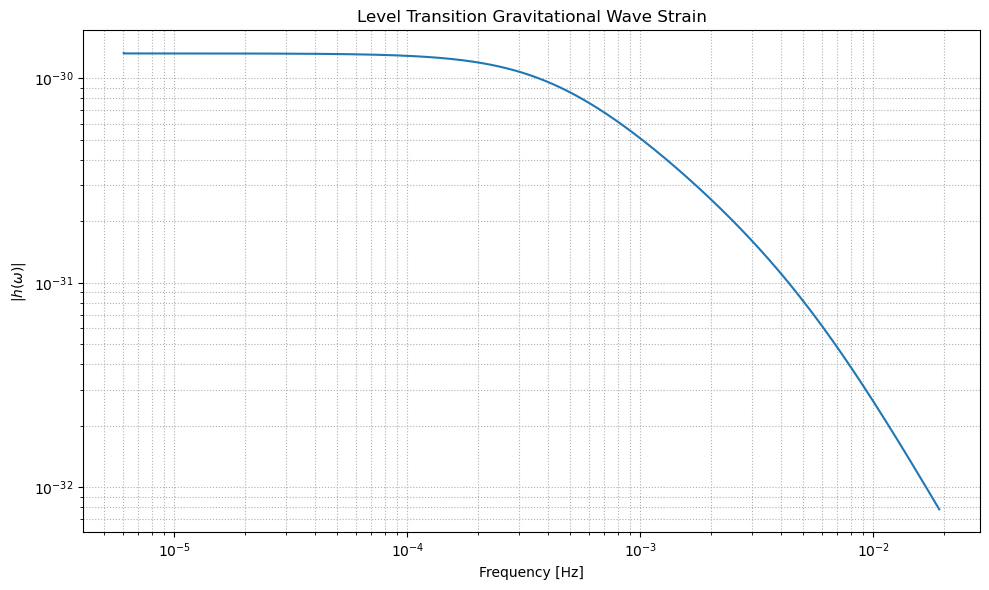

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constants ---
Mp = 1.220890e19
G = 1 / Mp**2           # Newton's G in GeV^-2
gev_to_hz = 6.582119569e-25 # GeV to Hz
M_sun = 1.989e30 * 5.61e26  # Solar mass in GeV
Mpc_to_Gev = 1.56e38        # 1 Mpc in GeV
kpc_to_Gev = Mpc_to_Gev / 1000
hbar_GeV = 6.582e-25 


# --- Level Transition Parameters ---
ne, ng = 6, 5
l = m = ng - 1
r_kpc = 1
r = r_kpc * kpc_to_Gev
M_tr = 1e-6 * M_sun
mu_a = 1e-13  # GeV
a_tr = 0.999999
alpha_tr = G * M_tr * mu_a
omega_plus = Omega_plus(a_tr, G*M_tr)

# --- Transition Frequency ---
omega_tr = 0.5 * mu_a * alpha_tr**2 * (1/ng**2 - 1/ne**2)

# --- Frequency Range (GeV) ---
omega = np.logspace(-29, -25.5, 10000)


gamma_e_vals = np.array([super_gamma(ne, l, m, w, mu_a, M_tr, r_plus(M_tr, a_tr), a_tr) for w in omega])
gamma_g_vals = np.array([super_gamma(ng, l, m, w, mu_a, M_tr, r_plus(M_tr, a_tr), a_tr) for w in omega])
# print(gamma_g_vals)
gamma_tr_val = gamma_t(ng, ne, mu_a, alpha_tr, M_tr)  # constant

T_vals = 2 / gamma_g_vals[0]  # Time scale (s) in GeV^-1
Ng = []
Ne = []
Ng0 = 0 
Ne0 = 0


for num, w in enumerate(omega):

    Ng0 = np.abs(N_g_omega(w, gamma_g_vals[num],gamma_tr_val, Ne0,T_vals))
    Ne0 = np.abs(N_g_omega(w, gamma_e_vals[num],gamma_tr_val, Ng0,T_vals))
    Ng.append(Ng0)
    Ne.append(Ne0)

Ne = np.array(Ne)
Ng = np.array(Ng)

# --- Compute strain ---
trans_strain = h_tr(r, omega_tr, gamma_e_vals, gamma_g_vals, gamma_tr_val, T_vals, omega,Ne,Ng)
trans_strain_abs = np.abs(trans_strain)*hbar_GeV

# --- Plot ---


f_hz_tr = omega / (np.sqrt(2*np.pi)* hbar_GeVs)


plt.figure(figsize=(10, 6))
plt.title('Level Transition Gravitational Wave Strain')
plt.plot(f_hz_tr, trans_strain_abs)
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$|h(\omega)|$')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1, 1e4)
# plt.ylim(1e-45, 1e-42)
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()

# Level Transition Strain Annihilation Comparison 

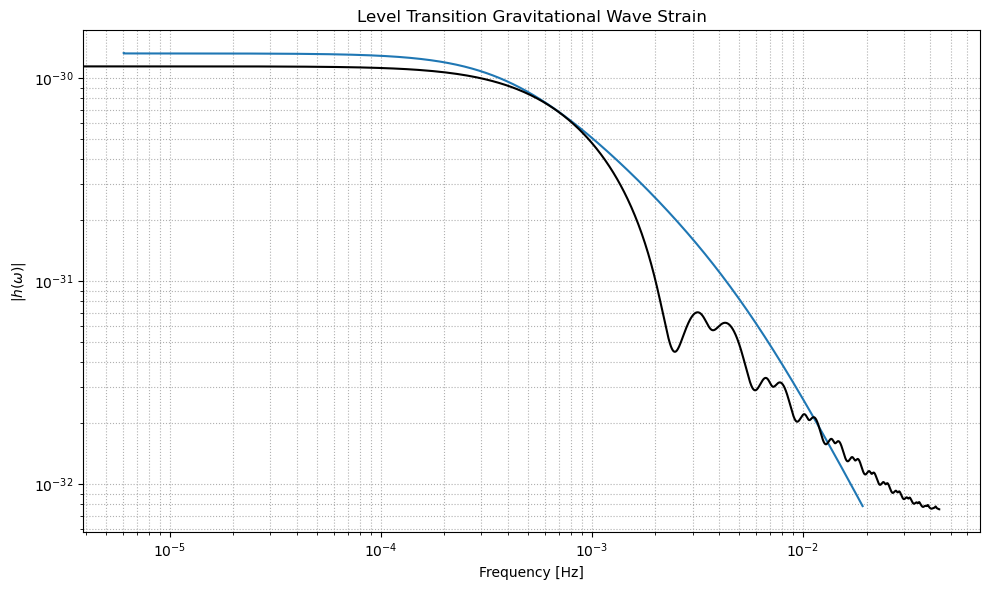

In [37]:
plt.figure(figsize=(10, 6))
plt.title('Level Transition Gravitational Wave Strain')
plt.plot(f_hz_tr, trans_strain_abs)
plt.plot(freqs_tr, fft_tr, color='black', label='FFT $|h(f)|$')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$|h(\omega)|$')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1, 1e4)
# plt.ylim(1e-45, 1e-42)
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()

# Annihilation Frequency Domain Strain

In [38]:
import numpy as np
import mpmath as mp


def _mp_ei_vec(z):
    return np.vectorize(lambda zz: complex(mp.ei(zz)))(z)

def h_ann(omega, N, Gamma_a, r, omega_ann):

    omega = np.asarray(omega, dtype=np.complex128)
    z = 1j * omega / (Gamma_a * N)  # argument for Ei and exponential
    
    pref = 1/(2*np.pi)*np.sqrt(4.0 * G  / (Gamma_a*r**2 * omega_ann))
    Ei = -2.0 * _mp_ei_vec(z) - np.log(-1j*omega) + np.log(1j*omega) + 1j * np.pi * np.sign(np.real(omega)) 

    return pref * np.exp(z) *Ei



3.9730733370262326e-16


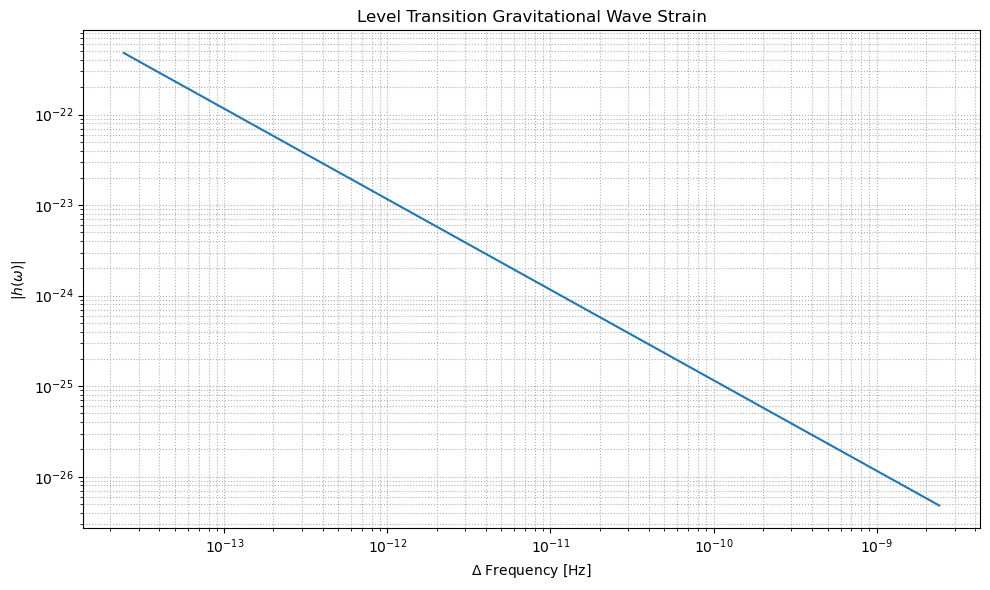

In [39]:
# Dependent Params
M_ann = 3.1e-04  # in solar masses
max_N = N_max(M_ann)
M_ann = M_ann*M_sun # Solar masses in GeV
mua_ann = 2e-16  # in GeV
a_ann = 0.999999
alpha_ann = G*M_ann*mua_ann
r_kpc = 1
r = r_kpc * kpc_to_Gev
n = 4
m = l = n-1

# call functions
omega = np.logspace(-37, -32, 10000) # in GeV
omega_a = omega_ann(mua_ann, alpha_ann, n) # in GeV
print(omega_a)
gamma_ann = gamma_a(l, alpha_ann, M_ann) # in GeV

T_ann = 1/gamma_ann

ann_strain_abs = np.abs(h_ann(omega, max_N, gamma_ann, r, omega_a))*hbar_GeV
#frequency strain has units of h*Gev, need to convert to Hz and then divide by timescale of event (2e6) to match discrete fft


# convert to Hz for x-axis plots
omega_hza = omega / (2*np.pi*hbar_GeV)


plt.figure(figsize=(10, 6))
plt.title('Level Transition Gravitational Wave Strain')
plt.plot(omega_hza, ann_strain_abs)
plt.xlabel('$\Delta$ Frequency [Hz]')
plt.ylabel(r'$|h(\omega)|$')
plt.xscale('log')
plt.yscale('log')    
# plt.xlim(1, 1e4)
# plt.ylim(1e-45, 1e-42)
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()

# Annihilation Strain Amplitude Comparison

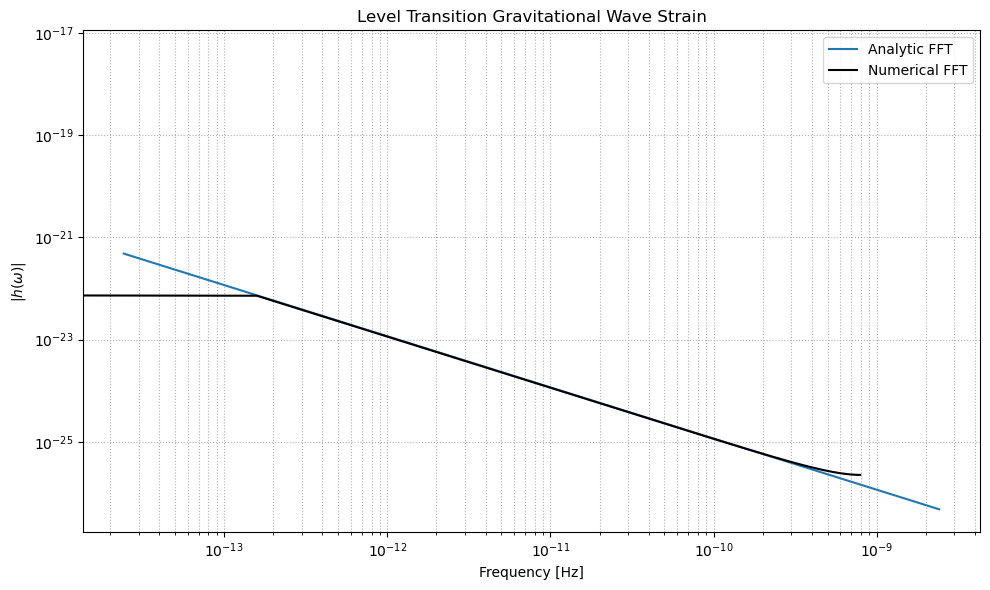

In [40]:
plt.figure(figsize=(10, 6))
plt.title('Level Transition Gravitational Wave Strain')
plt.plot(omega_hza, ann_strain_abs, label = 'Analytic FFT')
plt.plot(freqs_ann, np.abs(fft_ann), color='black', label='Numerical FFT')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$|h(\omega)|$')
plt.xscale('log')
plt.yscale('log')    

plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()

# Numerical vs Analytic, all strains

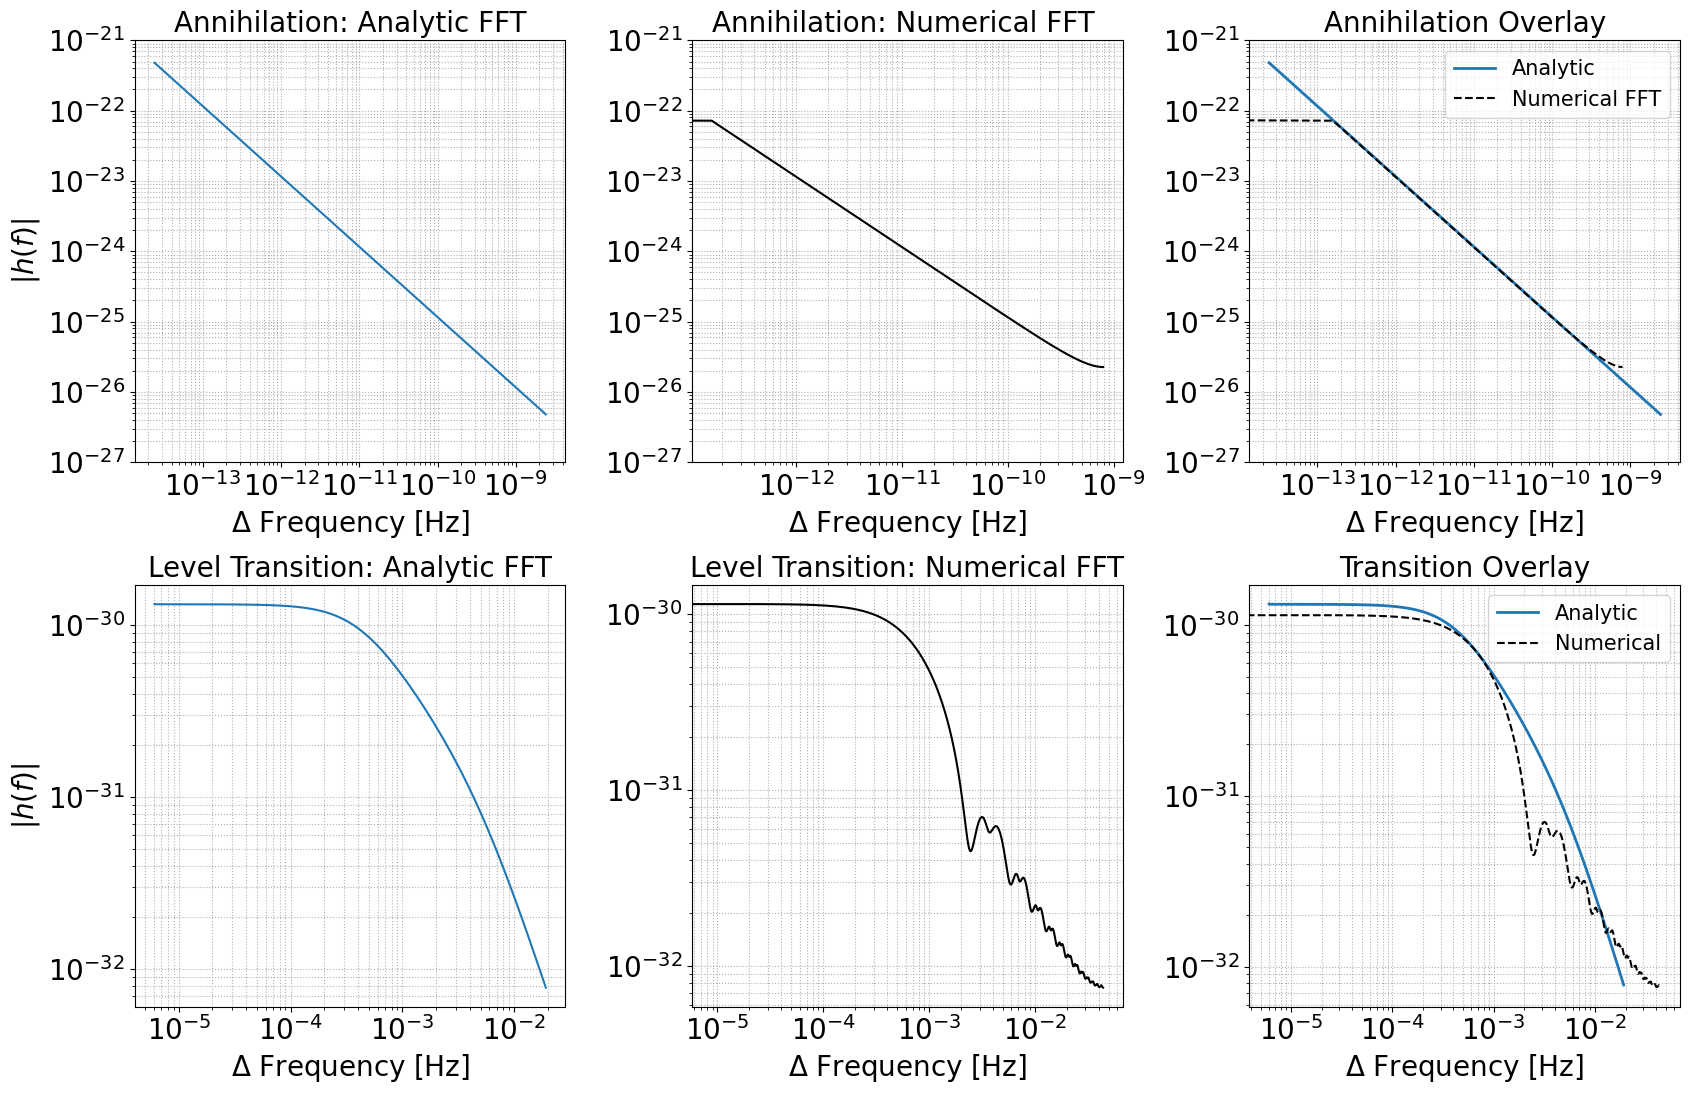

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Font size parameters
# --------------------------
title_fs = 20
label_fs = 20
tick_fs  = 20
legend_fs = 15

# --------------------------
# Plotting
# --------------------------

fig, axs = plt.subplots(2, 3, figsize=(17, 12))

# --- Row 1: Annihilation ---
# 1) Analytic annihilation
ax = axs[0, 0]
ax.plot(omega_hza, ann_strain_abs)
ax.set_title('Annihilation: Analytic FFT', fontsize=title_fs)
ax.set_xlabel('$\Delta$ Frequency [Hz]', fontsize=label_fs)
ax.set_ylabel(r'$|h(f)|$', fontsize=label_fs)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-27, 1e-21)
ax.tick_params(axis='both', which='major', labelsize=tick_fs)
ax.grid(True, which='both', ls=':')

# 2) Numerical FFT annihilation
ax = axs[0, 1]
ax.plot(freqs_ann, np.abs(fft_ann), color='black')
ax.set_title('Annihilation: Numerical FFT ', fontsize=title_fs)
ax.set_xlabel('$\Delta$ Frequency [Hz]', fontsize=label_fs)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-27, 1e-21)
ax.tick_params(axis='both', which='major', labelsize=tick_fs)
ax.grid(True, which='both', ls=':')

# 3) Overlay: analytic + numerical annihilation
ax = axs[0, 2]
ax.plot(omega_hza, ann_strain_abs, label='Analytic', lw=2)
ax.plot(freqs_ann, np.abs(fft_ann), color='black', ls='--', label='Numerical FFT')
ax.set_title('Annihilation Overlay', fontsize=title_fs)
ax.set_xlabel('$\Delta$ Frequency [Hz]', fontsize=label_fs)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-27, 1e-21)
ax.legend(fontsize=legend_fs)
ax.tick_params(axis='both', which='major', labelsize=tick_fs)
ax.grid(True, which='both', ls=':')

# --- Row 2: Transition ---
# 4) Analytic transition
ax = axs[1, 0]
ax.plot(f_hz_tr, trans_strain_abs)
ax.set_title('Level Transition: Analytic FFT', fontsize=title_fs)
ax.set_xlabel('$\Delta$ Frequency [Hz]', fontsize=label_fs)
ax.set_ylabel(r'$|h(f)|$', fontsize=label_fs)
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=tick_fs)
ax.grid(True, which='both', ls=':')

# 5) Numerical FFT transition
ax = axs[1, 1]
ax.plot(freqs_tr, np.abs(fft_tr), color='black')
ax.set_title('Level Transition: Numerical FFT', fontsize=title_fs)
ax.set_xlabel('$\Delta$ Frequency [Hz]', fontsize=label_fs)
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=tick_fs)
ax.grid(True, which='both', ls=':')

# 6) Overlay: analytic + numerical transition
ax = axs[1, 2]
ax.plot(f_hz_tr, trans_strain_abs, label='Analytic', lw=2)
ax.plot(freqs_tr, np.abs(fft_tr), color='black', ls='--', label='Numerical')
ax.set_title('Transition Overlay', fontsize=title_fs)
ax.set_xlabel('$\Delta$ Frequency [Hz]', fontsize=label_fs)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=legend_fs)
ax.tick_params(axis='both', which='major', labelsize=tick_fs)
ax.grid(True, which='both', ls=':')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Both Strains on the same axis

In [42]:
# import numpy as np
# import matplotlib.pyplot as plt

# # --- Constants ---
# Mp = 1.220890e19
# G = 1 / Mp**2           # Newton's G in GeV^-2
# gev_to_hz = 6.582119569e-25 # GeV to Hz
# M_sun = 1.989e30 * 5.61e26  # Solar mass in GeV
# Mpc_to_Gev = 1.56e38        # 1 Mpc in GeV
# kpc_to_Gev = Mpc_to_Gev / 1000
# hbar_GeV = 6.582e-25 


# #############################################################################################################################
# #                                               Transition Block                                                           `#
# #############################################################################################################################


# # --- Level Transition Parameters ---
# ne, ng = 6, 5
# l = m = ng - 1
# r_kpc = 1
# r = r_kpc * kpc_to_Gev
# M_tr = 1e-6 * M_sun
# mu_a = 1e-13  # GeV
# a_tr = 0.999999
# alpha_tr = G * M_tr * mu_a
# omega_plus = Omega_plus(a_tr, G*M_tr)

# # --- Transition Frequency ---
# omega_tr = 0.5 * mu_a * alpha_tr**2 * (1/ng**2 - 1/ne**2)

# # --- Frequency Range (GeV) ---
# omega = np.logspace(-36, -26, 10000)


# gamma_e_vals = np.array([super_gamma(ne, l, m, w, mu_a, M_tr, r_plus(M_tr, a_tr), a_tr) for w in omega])
# gamma_g_vals = np.array([super_gamma(ng, l, m, w, mu_a, M_tr, r_plus(M_tr, a_tr), a_tr) for w in omega])
# # print(gamma_g_vals)
# gamma_tr_val = gamma_t(ng, ne, mu_a, alpha_tr, M_tr)  # constant

# T_vals = 2 / gamma_g_vals[0]  # Time scale (s) in GeV^-1
# Ng = []
# Ne = []
# Ng0 = 0 



# for num, w in enumerate(omega):

#     Ng0 = np.abs(N_g_omega(w, gamma_g_vals[num],gamma_tr_val, Ne0,T_vals))
#     Ne0 = np.abs(N_g_omega(w, gamma_e_vals[num],gamma_tr_val, Ng0,T_vals))
#     Ng.append(Ng0)
#     Ne.append(Ne0)

# Ne = np.array(Ne)
# Ng = np.array(Ng)

# # --- Compute strain ---
# trans_strain = h_tr(r, omega_tr, gamma_e_vals, gamma_g_vals, gamma_tr_vals, T_vals, omega,Ne,Ng)
# trans_strain_abs = np.abs(trans_strain)*hbar_GeV

# # --- Plot ---


# f_hz = omega / (2 * np.pi * hbar_GeVs)



# #############################################################################################################################
# #                                               Annihilation Block                                                         `#
# #############################################################################################################################
# M_ann = 3.1e-04  # in solar masses
# max_N = N_max(M_ann)
# M_ann = M_ann*M_sun # Solar masses in GeV
# mua_ann = 2e-16  # in GeV
# a_ann = 0.999999
# alpha_ann = G*M_ann*mua_ann
# r_kpc = 1
# r = r_kpc * kpc_to_Gev
# n = 4
# m = l = n-1

# # call functions

# omega_a = omega_ann(mua_ann, alpha_ann, n) # in GeV
# gamma_ann = gamma_a(l, alpha_ann, M_ann) # in GeV
# print(gamma_ann)
# T_ann = 1/gamma_ann
# print(T_ann)

# ann_strain_abs = np.abs(h_ann(omega, max_N, gamma_ann, r, omega_a))*hbar_GeV
# #frequency strain has units of h*Gev, need to convert to Hz and then divide by timescale of event (2e6) to match discrete fft


# # convert to Hz for x-axis plots
# omega_hza = omega / gev_to_hz


# plt.figure(figsize=(10, 6))
# plt.title('Gravitational Wave Strain: Transition vs Annihilation')
# plt.plot(f_hz, trans_strain_abs, label='Transition')
# plt.plot(f_hz, ann_strain_abs, label='Annihilation')
# plt.xlabel('Frequency [Hz]')         # keeping your label text
# plt.ylabel(r'$|h(\omega)|$')
# plt.xscale('log')
# plt.yscale('log')
# plt.grid(True, which='both', ls=':')
# plt.legend()
# plt.tight_layout()
# plt.show()

# Reproducing Henrys Binary Perturbation Level Transition Strain

In [116]:
import numpy as np
Mp = 1.220890e19
G = 1 / Mp**2   

def a_tilde_crit(m_i, alpha):
    m2 = m_i**2
    return (4.0 * m_i * alpha) / (m2 + 4.0 * alpha**2)


def q_c(alpha, m_i, a_tilde):

    m = float(m_i)
    one_minus = (1.0 - a_tilde / m)
    # guard small rounding errors inside the sqrt:
    inner = 1.0 - (4.0 * alpha / m * one_minus) ** 2
    inner = np.clip(inner, 0.0, 1.0)

    denom = m**2 * (1.0 - np.sqrt(inner))**2
    # Avoid divide-by-zero:
    if denom == 0.0:
        return 0.0

    return 8.0 * alpha**2 * one_minus / denom


# M is host BH mass
# Omega_0 is angular momentum at BH horizon
def h0_from_params(qc, M, r, alpha, Omega0):

    return 24.0 * G*(qc * M / r) * (alpha ** -4) * (G*M * Omega0) ** 2



def gamma_rate(q, M, Omega0):
    return (Omega0**2) * (96.0 / 5.0) * (q / (q + 1.0) ** (1.0 / 3.0)) * (M * Omega0) ** (5.0 / 3.0)



def z_parameter(eta, Delta_m, gamma):
    return (eta ** 2) / (abs(Delta_m) * gamma)


def z_scaling_211_to_21m1(alpha, q):
    """
    z_{211->21-1} ≈ 7 * (1.81/(1+4 α^2))^(1/3) * (q)^(1/3) * (2/(1+q))^(5/3) * (0.45/α)^(11/3)
    """
    return 7.0 * (1.81 / (1.0 + 4.0 * alpha**2)) ** (1.0 / 3.0) \
             * (q ** (1.0 / 3.0)) \
             * (2.0 / (1.0 + q)) ** (5.0 / 3.0) \
             * (0.45 / alpha) ** (11.0 / 3.0)



def fc_from_Omega0(Omega0):
    return (2.0 / np.pi) * Omega0*1e23

def psi_plus(f, r, f0, Delta_m, gamma):
    return f * r + (f - f0) ** 2 / (4.0 * abs(Delta_m) * gamma) - np.pi / 4.0



def htilde_plus(
    f,                     # array-like (Hz in your chosen units)
    M, r, alpha,           # source mass, distance, fine-structure parameter
    Omega0,                # orbital frequency scale
    q,                     # binary mass ratio (companion/host)
    m_i, m_f,              # initial/final magnetic quantum numbers (e.g., 1 -> -1)
    eta,                   # parameter entering z (or leave None to use z_scaling below)
    Gamma_abs,             # |Γ| > 0 (same units as f)
    use_z_scaling=False    # if True, use Eq. (15.5) instead of z=η^2/(|Δm|γ)
):
    f = np.asarray(f, dtype=float)
    Delta_m = abs(m_f - m_i)

    # ã_crit and q_c
    acrit = a_tilde_crit(m_i, alpha)
    qc = q_c(alpha, m_i, acrit)

    # h0 amplitude (15.12)
    h0 = h0_from_params(qc, M, r, alpha, Omega0)

    # gamma (15.9)
    gamma = gamma_rate(q, M, Omega0)

    # z (15.1) or scaling (15.5)
    if use_z_scaling:
        z = z_scaling_211_to_21m1(alpha, q)
    else:
        z = z_parameter(eta, Delta_m, gamma)

    # central frequency and phase (under 15.15)
    f_c = fc_from_Omega0(Omega0)
    f0 = f_c
    # print(f'{f0:.4}')
    phase = psi_plus(f, r, f0, Delta_m, gamma)

    # denominator and envelope
    denom = (np.sqrt(z) / abs(Gamma_abs)) - 1j * np.pi * (f - f_c)
    envelope = np.exp(-np.pi * z) * np.exp(-2.0 * z * np.arctan(np.pi * (f - f0) / abs(Gamma_abs)))

    # assemble, need factor of G to account for units of denominator gamma and freq ( 1/Hz = GeV, therefore need 1/Gev, -> sqrt(G)=1/Mp)
    pref = np.sqrt(G)*h0 * (1.0 + np.cos(0.0)**2)* np.sqrt(np.pi) * (Delta_m ** 2)  # placeholder; will be overwritten below
    # Fix: include actual inclination:
    def with_inclination(iota):
        pref = h0*(1.0 + np.cos(iota) ** 2) * np.sqrt(np.pi) * (Delta_m ** 2)

        return np.sqrt(G)*pref * np.exp(1j * phase) * envelope / denom
    # For troubleshooting below
    # print(f'h0 is: {h0}')
    # print(f'Prefix is: {pref}')
    # print(f'envelope is: {max(envelope)}')
    # print(f'denom is: {min(denom)}')
    return with_inclination


# TODO: Add the relativistic portion of the code

Boson Mass is: 4.065197433e-14 GeV 

BH Mass is: 1e-06 solar masses

Omega0 is: 6.39e+03 MHz


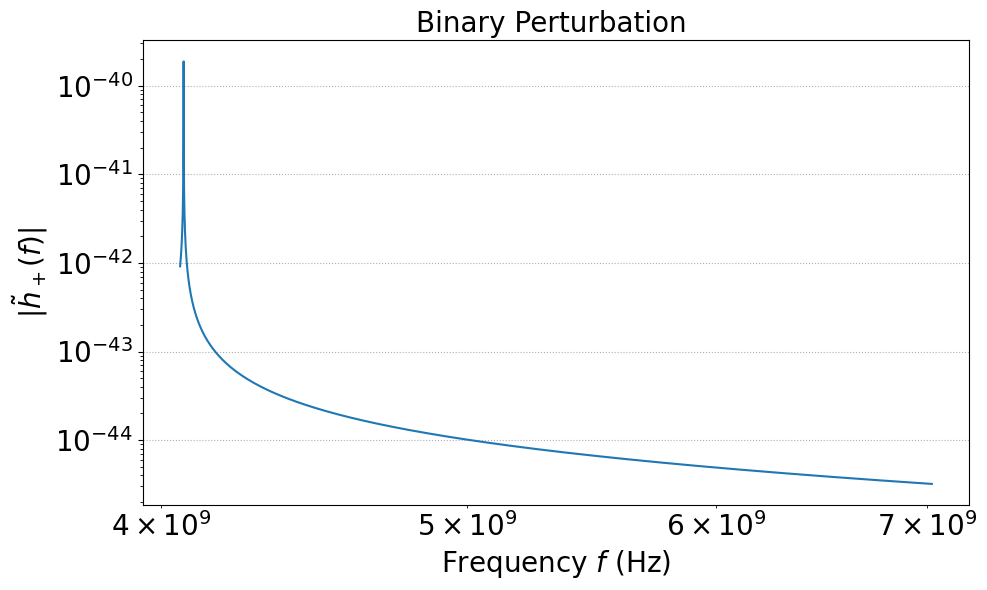

In [117]:


M = 1e-6      # BH mass in solar masses
M *= 1.1e57 # GeV conversion
r      = 1    # kpc
r *=  1.6e35 # Kpc in GeV^-1
alpha  = 0.3

m_boson = alpha/(G*M) # Boson mass in GeV
   # choose so that f_c ~ 1e3
q      = 0.1 # Binary mass ratio
m_i    = 1
m_f    = -1 # Quantum Numbers
eta    = 5.0e-2      # parameter entering z (or leave None to use z_scaling below)
a = a_tilde_crit(m_i, alpha)
Omega0 = Omega_plus(a,r_plus(M,a)) / (2.0/np.pi) # Frequency in Gev
Gamma_abs = super_gamma(2, 1, 1, Omega0, m_boson, M, r, a)    # width |Γ| in Hz (or your freq units)
Omega0_Hz = Omega0*1e23
f = np.linspace(Omega0_Hz*0.635, Omega0_Hz*1.1, 10000)


h_of_iota = htilde_plus(
    f, M, r, alpha, Omega0, q, m_i, m_f, eta, Gamma_abs,
    use_z_scaling=False   # set True to use Eq. (15.5) scaling instead of 15.1
)
print(f'Boson Mass is: {m_boson} GeV \n')
print(f'BH Mass is: {M/1.1e57} solar masses\n')
print(f'Omega0 is: {Omega0*1e23/1e6:.3} MHz')
iota = 0  # rad
Hf = h_of_iota(iota)

# Plot amplitude
plt.figure(figsize=(10,6))
plt.semilogy(f, np.abs(Hf))
plt.xlabel("Frequency $f$ (Hz)",  fontsize=label_fs)
plt.title( 'Binary Perturbation ', fontsize=title_fs)
plt.xscale('log')
plt.ylabel(r"$|\tilde h_+(f)|$", fontsize=label_fs)
plt.tick_params(axis='both', which='both', labelsize=tick_fs)
plt.grid(True, ls=":")
plt.tight_layout()
plt.show()


These params work well \
Boson Mass is: 4.065197433e-14 GeV \
BH Mass is: 1e-06 solar masses\
Omega0 is: 6.39e+03 MHz